# Data Sampling and Collection

This data was collected by the National Parks Service in the United States. The purpose of creating this dataset
was to "provide information on the presence and status of species in our national parks." 

According to the National Parks Service's description of this data, the "time and effort spent on species 
inventories varies from park to park." This can mean that just because an animal is not seen within the park, that
does not mean it does not reside there. Likewise, if an animal is seen within the park, it could be a rare
occurance and the case that the animal does not reside there. This could potentially lead to a sampling bias
known as undercoverage, where some members of the population are inadequately represented in the sample.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
from pathlib import Path

import os
import plotly

from IPython.display import display, Image 
def display_figure_for_grader(fig):
    plotly.io.write_image(fig, 'temp.png')
    display(Image('temp.png'))    

In [2]:
#Read in the data 
# path to directory containing data
dsDir = Path('data')

parks_df = pd.read_csv(dsDir/'national_parks_biodiversity_parks.csv')
species_df = pd.read_csv(dsDir/'national_parks_biodiversity_species.csv', dtype=str)

In [3]:
#Check that everything was imported properly
display(parks_df.head())
display(species_df.head())

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


# Data Cleaning

Because my research question is concerning the relationship between biodiversity in a national park and various
attributes of that environment, I am using the 'national_parks_biodiversity_parks.csv' and 
'national_parks_biodiversity_species.csv' files. These files contain several important environmental attributes
such as location (latitude and longitude), size of the park (acres), the nativeness of the species, and the 
number of unique species found at each park. This data encompasses many different kinds of variables such as 
quantitative and qualitative variables, and, more specifically, it contains continuous, discrete, categorical,
and nominal variables

This dataset is very detailed and its granularity heavily influences the analysis that we are performing. The 
species are not solely represented by their scientific names, but they are also represented by their class, family,
order, colloquial names, occurance, nativeness, abundance, etc. The national park set also has a high level of 
granularity as the longitude, latitude, state, number of acres, and park code is represented to describe each
individual park.

Although this dataset is great, in the 'national_parks_biodiversity_species.csv' file there are three columns 
which I consider to be unnecessary. The 'Conservation Status', 'Seasonality', and 'Abundance' columns all have a
significant amount of missing data and are not required for the anaylsis that we are doing today. Additionally, 
there appears to be an error column, 'Unnamed: 13', that is entirely empty. Lastly, we do have some NaN values in
a few of the columns, but that does not need to be cleaned up until we begin splitting the dataframe further to 
obtain the variables that we need for our analysis.

In [4]:
#Clean up Biodiversity Species Data Frame
clean_species_df = species_df.drop(columns=['Conservation Status', 'Seasonality', 'Abundance', 'Unnamed: 13'])

In [5]:
#We are only concerned with present and approved species
clean_species_df = clean_species_df[(clean_species_df['Occurrence'] == 'Present') & (clean_species_df['Record Status'] == 'Approved')]

In [6]:
#Merge the data frames together
merged_df = clean_species_df.merge(parks_df, how='inner', on='Park Name')
merged_df.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Park Code,State,Acres,Latitude,Longitude
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,ACAD,ME,47390,44.35,-68.21
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,ACAD,ME,47390,44.35,-68.21
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,ACAD,ME,47390,44.35,-68.21
3,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,ACAD,ME,47390,44.35,-68.21
4,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,ACAD,ME,47390,44.35,-68.21


# Exploratory Data Analysis (EDA)

In [7]:
#Is there a correlation between the size of the national park and 
#the number of unique species for that park?

merged_copy = merged_df.copy()

#this column will be used to calculate the sum
merged_copy['to_be_deleted'] = 1

#create a copy of parks_df so that we are not changing the original dataframe
parks_copy = parks_df.copy()

parks_pivot = pd.pivot_table(merged_copy, values='to_be_deleted', index='Park Name', aggfunc=np.sum)
parks_pivot.reset_index(inplace=True)
parks_copy = parks_copy.merge(parks_pivot, how='inner', on='Park Name')
parks_copy.rename(columns={'to_be_deleted':'Total # of Unique Species'}, inplace=True)
parks_copy.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Total # of Unique Species
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1168
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,750
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,689
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,1926
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1327


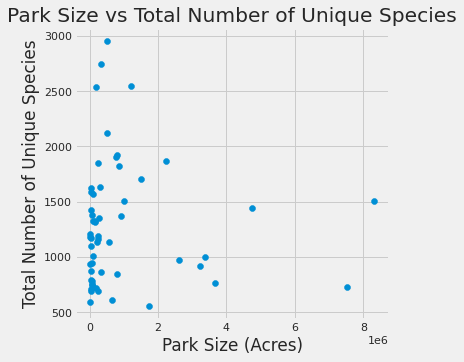

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(parks_copy['Acres'], parks_copy['Total # of Unique Species'])
plt.xlabel('Park Size (Acres)')
plt.ylabel('Total Number of Unique Species')
plt.title('Park Size vs Total Number of Unique Species')
plt.show()

##### Is there a correlation between the size of the national park and the number of unique species for that park

The scatter plot here is not super helpful. The data is pretty overcrowded and seems to be skewed toward the 
right. Here we can also see several outliers as the number of acres begins to increase.   

To find the correlation between the number of acres and total number of unique species, we should use a
Spearman's r, non-parametric, test. This test can be used to measure the strength of association between two 
numerical values in the case where the normality of the distribution of variables is not clear. The coefficient
r lies between 1 and -1, where 1 is a perfect positive correlation and -1 is a perfect negative correlation. 

In [9]:
#Spearman's r
parks_copy[['Acres', 'Total # of Unique Species']].corr(method='spearman')

,Acres,Total # of Unique Species
Acres,1.000000,0.239636
Total # of Unique Species,0.239636,1.000000


Here, we can see that our r coefficient is 0.239636. This means that the size of the national park and the total
unique species within that park have a weak monotonically increasing relationship. In other words, these two 
variables have a weak positive correlation.

Text(0.5, 1.0, 'Latitude vs Total Number of Unique Species')

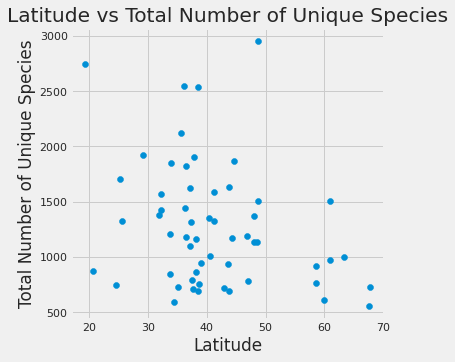

In [10]:
#Is there a correlation between the latitude of the national park and 
#the number of unique species for that park?

plt.figure(figsize=(5,5))
plt.scatter(parks_copy['Latitude'], parks_copy['Total # of Unique Species'])
plt.xlabel('Latitude')
plt.ylabel('Total Number of Unique Species')
plt.title('Latitude vs Total Number of Unique Species')

##### Is there a correlation between the latitude of the national park and the number of unique species for that park?

This scatter plot is a bit better in terms of giving us a clear picture to look at. From this, we can hypothesize
that these variable will have a negative correlation, however, we cannot speak to the strength of that correlation
by just looking at the picture. 

In [11]:
parks_copy[['Latitude','Total # of Unique Species']].corr(method='spearman')

,Latitude,Total # of Unique Species
Latitude,1.000000,-0.273874
Total # of Unique Species,-0.273874,1.000000


Our Spearman r coefficient, -0.274, does confirm that there is a negative correlation between latitude and the total number of unique species foun within a national park. However, we can note that the strength of this correlation is not much as the coefficient is not very close to -1. 

Text(0.5, 1.0, 'Longitude vs Total Number of Unique Species')

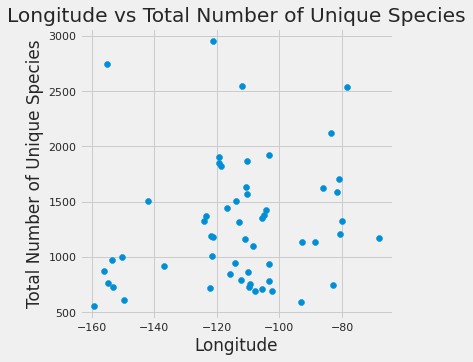

In [12]:
#Is there a correlation between the longitude of the national park and 
#the number of unique species for that park?

plt.figure(figsize=(5,5))
plt.scatter(parks_copy['Longitude'], parks_copy['Total # of Unique Species'])
plt.xlabel('Longitude')
plt.ylabel('Total Number of Unique Species')
plt.title('Longitude vs Total Number of Unique Species')

##### Is there a correlation between the longitude of the national park and the number of unique species for that park?

Much like the above plot, we can hypothesize that these variables will have a positive correlation, however, 
we cannot speak to the strength of that correlation by just looking at the picture. There are more outliers in
this plot, compared to the previous one but we can still notice there seems to be an upward trend.

In [13]:
parks_copy[['Longitude','Total # of Unique Species']].corr(method='spearman')

,Longitude,Total # of Unique Species
Longitude,1.000000,0.137906
Total # of Unique Species,0.137906,1.000000


Our Spearman r coefficient, 0.138, does confirm that there is a positive correlation between longitude and the 
total number of unique species found within a national park, albeit a weak one.

# Data Modeling and Inferences

From the visualizations and statistical tests above we can see that there is some correlation between the total number of unique species located at the park and the location and size of the park. This information is extremely helpful is deciding which features to use for our multiple linear regression model. This type of model works best to allow us to predict our dependent variable (total number of unique species in each national park) using multiple independent variables (location, size, etc.).

We already have our features for location and size, but this will not be enough to get a favorable value for our RMSE (root mean squared error) which is the best metric for judging the accuracy of our model. In the cell below we will use two categorical variables 'Occurrence' and 'Category' as additional features of our model.

In [14]:
occurrence_df = species_df.copy()
category_df = species_df.copy()

occurrence_df['Occurrence'].dropna()

occurrence_df['to_be_deleted'] = 1
category_df['to_be_deleted'] = 1

occurrence_pivot = pd.pivot_table(occurrence_df, 
                                values='to_be_deleted', 
                                index='Park Name', 
                                columns='Occurrence', 
                                aggfunc=np.sum)
category_pivot = pd.pivot_table(category_df, 
                                values='to_be_deleted', 
                                index='Park Name', 
                                columns='Category', 
                                aggfunc=np.sum)

occurrence_pivot = occurrence_pivot.replace(np.nan, 0)
category_pivot = category_pivot.replace(np.nan, 0)

occurrence_pivot.head(), category_pivot.head()

(Occurrence              Approved  In Review  Not Confirmed  Not Present  \
 Park Name                                                                 
 Acadia National Park         1.0        0.0          399.0          0.0   
 Arches National Park         0.0        0.0          256.0          0.0   
 Badlands National Park       1.0        0.0          195.0          4.0   
 Big Bend National Park       0.0        0.0          207.0          0.0   
 Biscayne National Park       1.0        0.0          146.0          1.0   
 
 Occurrence              Not Present (False Report)  \
 Park Name                                            
 Acadia National Park                          18.0   
 Arches National Park                          39.0   
 Badlands National Park                        19.0   
 Big Bend National Park                         0.0   
 Biscayne National Park                        53.0   
 
 Occurrence              Not Present (Historical Report)  Present  
 Park Name 

In [15]:
occurrence_pivot.reset_index()
category_pivot.reset_index()

#merge pivot tables into dataframe for multiple linear regression
mlr_df = parks_copy.merge(occurrence_pivot, how='inner', on='Park Name')
mlr_df = mlr_df.merge(category_pivot, how='inner', on='Park Name')

mlr_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Total # of Unique Species,Approved,In Review,Not Confirmed,...,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1168,1.0,0.0,399.0,...,38.0,0.0,0.0,0.0,55.0,0.0,11.0,0.0,0.0,1226.0
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,750,0.0,0.0,256.0,...,11.0,0.0,0.0,0.0,59.0,0.0,20.0,0.0,0.0,745.0
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,689,1.0,0.0,195.0,...,24.0,173.0,239.0,1.0,64.0,0.0,13.0,0.0,1.0,625.0
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,1926,0.0,0.0,207.0,...,53.0,0.0,0.0,0.0,89.0,48.0,62.0,0.0,0.0,1589.0
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1327,1.0,0.0,146.0,...,818.0,0.0,11.0,34.0,28.0,0.0,40.0,0.0,0.0,554.0


Some national parks are located in multiple states. Because we will be one hot encoding our categorical variables it would be more advantageous if all of the parks only belonged to one state. For those parks that belong to two states, we will assign the park the first state in its list (of multiple states).

In [16]:
#Create a dataframe with only the features we need
mlr_df = mlr_df.drop(columns=['Park Code'])
mlr_df.at[15, 'State'] = 'CA'
mlr_df.at[24, 'State'] = 'TN'
mlr_df.at[53, 'State'] = 'WY'
mlr_df.head()

,Park Name,State,Acres,Latitude,Longitude,Total # of Unique Species,Approved,In Review,Not Confirmed,Not Present,...,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
0,Acadia National Park,ME,47390,44.35,-68.21,1168,1.0,0.0,399.0,0.0,...,38.0,0.0,0.0,0.0,55.0,0.0,11.0,0.0,0.0,1226.0
1,Arches National Park,UT,76519,38.68,-109.57,750,0.0,0.0,256.0,0.0,...,11.0,0.0,0.0,0.0,59.0,0.0,20.0,0.0,0.0,745.0
2,Badlands National Park,SD,242756,43.75,-102.50,689,1.0,0.0,195.0,4.0,...,24.0,173.0,239.0,1.0,64.0,0.0,13.0,0.0,1.0,625.0
3,Big Bend National Park,TX,801163,29.25,-103.25,1926,0.0,0.0,207.0,0.0,...,53.0,0.0,0.0,0.0,89.0,48.0,62.0,0.0,0.0,1589.0
4,Biscayne National Park,FL,172924,25.65,-80.08,1327,1.0,0.0,146.0,1.0,...,818.0,0.0,11.0,34.0,28.0,0.0,40.0,0.0,0.0,554.0


In [17]:
#Separate our dataframe into dependent and independent variables
x = mlr_df.drop(columns=['Total # of Unique Species', 'Vascular Plant',  'Fish', 'Bird',
                        'Amphibian', 'Algae','Insect', 'Invertebrate', 'Crab/Lobster/Shrimp',
                         'Slug/Snail'])
y = mlr_df['Total # of Unique Species']

In [18]:
#Handle categorical variables
states = pd.get_dummies(x, drop_first=True)
x = x.drop('State', axis=1)
x = states
x.head()

,Acres,Latitude,Longitude,Approved,In Review,Not Confirmed,Not Present,Not Present (False Report),Not Present (Historical Report),Present,...,State_OH,State_OR,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WY
0,47390,44.35,-68.21,1.0,0.0,399.0,0.0,18.0,119.0,1172.0,...,0,0,0,0,0,0,0,0,0,0
1,76519,38.68,-109.57,0.0,0.0,256.0,0.0,39.0,3.0,750.0,...,0,0,0,0,0,0,1,0,0,0
2,242756,43.75,-102.50,1.0,0.0,195.0,4.0,19.0,1.0,909.0,...,0,0,0,1,0,0,0,0,0,0
3,801163,29.25,-103.25,0.0,0.0,207.0,0.0,0.0,11.0,2011.0,...,0,0,0,0,0,1,0,0,0,0
4,172924,25.65,-80.08,1.0,0.0,146.0,1.0,53.0,82.0,1330.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x.columns

Index(['Acres', 'Latitude', 'Longitude', 'Approved', 'In Review',
       'Not Confirmed', 'Not Present', 'Not Present (False Report)',
       'Not Present (Historical Report)', 'Present', 'Fungi', 'Mammal',
       'Nonvascular Plant', 'Reptile', 'Spider/Scorpion',
       'Park Name_Arches National Park', 'Park Name_Badlands National Park',
       'Park Name_Big Bend National Park', 'Park Name_Biscayne National Park',
       'Park Name_Black Canyon of the Gunnison National Park',
       'Park Name_Bryce Canyon National Park',
       'Park Name_Canyonlands National Park',
       'Park Name_Capitol Reef National Park',
       'Park Name_Carlsbad Caverns National Park',
       'Park Name_Channel Islands National Park',
       'Park Name_Congaree National Park',
       'Park Name_Crater Lake National Park',
       'Park Name_Cuyahoga Valley National Park',
       'Park Name_Death Valley National Park',
       'Park Name_Denali National Park and Preserve',
       'Park Name_Dry Tortugas Nati

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = lm.LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

In [21]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_predict)
print("Adjusted-R^2: ", score)
print('MSE:',mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_predict)))

Adjusted-R^2:  0.8017349845455403
MSE: 35895.34683396052
RMSE: 189.46067358151274


Text(0.5, 1.0, 'Original vs Predicted Total Number of Unique Species')

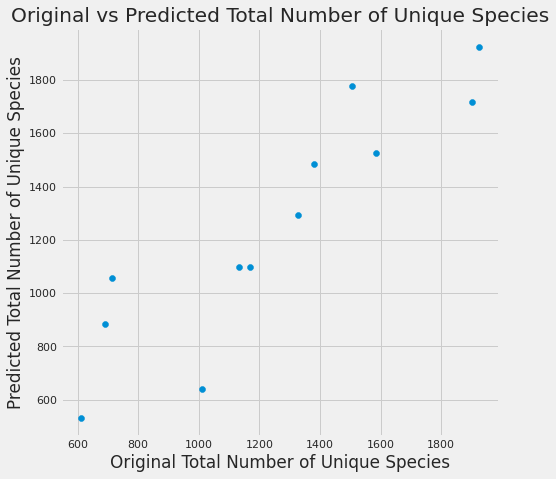

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_predict)
plt.xlabel('Original Total Number of Unique Species')
plt.ylabel('Predicted Total Number of Unique Species')
plt.title('Original vs Predicted Total Number of Unique Species')

Text(0.5, 1.0, 'Residual of Prediction for total number of unique species')

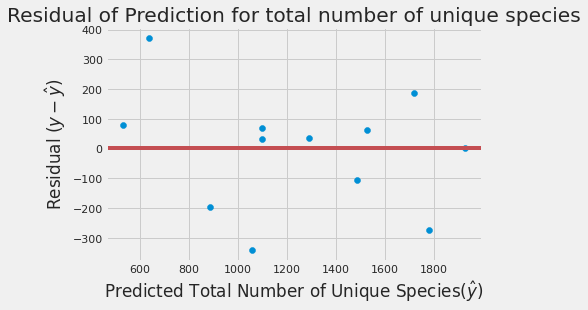

In [23]:
#Residual Plot
plt.scatter(y_predict, y_test-y_predict)
plt.axhline(y = 0, color='r')
plt.ylabel("Residual $(y - \hat{y})$")
plt.xlabel("Predicted Total Number of Unique Species$(\hat{y})$")
plt.title("Residual of Prediction for total number of unique species")

### Analysis

The above model that we have created seems to be a good model for predicting the biodiversity of a national park. We can assume this is a good model for our predictor because our adjusted-R squared is 0.802 and our RMSE is approximately 190, which given the range of values for our predictor is decently low. We can also tell that this model is a good model for our predictor because of the original vs predicted values plot and the residual plot. Observing the original vs predicted values plot we can see that the data follows a positive linear trend and is moderately close to the y=x line. Additionally, our residuals plot has few outliers and most of the data clusters around +/- 100, which again is pretty good given the range of values for our predictor.

# Conclusion

We have considered the research question: "Do the attributes of a national park, such as the location, size, etc.
influence the level of biodiversity within that park?" and "Can we use these features to predict the biodiversity of national parks?" Based on the above analysis we can say that there is some
correlation between the size of a national park, the location of the park, and its biodiversity. However, this
correlation is not strong and should be evaluated as such. Based on the evidence above, we can conclude that the 
attributes that make up a national park do contribute to some extent to the biodiversity of that park, but further
data and analysis is needed to truly understand what the causal relationship is between these variables and the
biodiversity of national parks. Furthermore, we can conclude that we can use the features of a national park to predict its biodiversity. We can draw this conclusion, because we have created a multiple linear regression model that does exactly this, and we know that it is indeed a satisfactory model because our adjusted-R squared is greater than 0.75-0.8 and our RMSE is considerably low given our range of total unique species in our dataset. 

In [24]:
#uncomment this line to download the tar file
#!tar chvfz 3037362429.tar.gz *